###### Name    :	Syed Karar Hussain Shahsain Shah
###### Roll No :	PIAIC145366
###### Email	 :    karar.shah2015@gmail.com
###### Course :    AI
###### Session:    No.1 (Respect Sir Nasir Hussain)(Saturday)

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

    ###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
def load_csv(path):
    a = pd.read_csv(path)
    return a

In [3]:
d = load_csv('compresive_strength_concrete.csv')

In [4]:
d.columns = ['Cement ','Blast Furnace Slag','Fly Ash','Water ','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength']

In [5]:
d.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Spliting and normalizing 

In [6]:
#min-max mormlization function
def min_max(data_set):
    p = data_set.copy()
    mx = data_set.max()
    mn = data_set.min()
    
    diff = mx - mn
    p = (p-mn) / diff
    print('min:\n',mn,'\nmax:\n',mx)
    return p

###### normalizing whole data with mean-std of whole data

In [7]:
d_mnmx = min_max(d)

min:
 Cement                           102.00
Blast Furnace Slag                 0.00
Fly Ash                            0.00
Water                            121.80
Superplasticizer                   0.00
Coarse Aggregate                 801.00
Fine Aggregate                   594.00
Age                                1.00
Concrete compressive strength      2.33
dtype: float64 
max:
 Cement                            540.0
Blast Furnace Slag                359.4
Fly Ash                           200.1
Water                             247.0
Superplasticizer                   32.2
Coarse Aggregate                 1145.0
Fine Aggregate                    992.6
Age                               365.0
Concrete compressive strength      82.6
dtype: float64


In [8]:
#mean-std normalization function
def mean_std(data_set):
    p = data_set.copy()
    m = data_set.mean()
    p -= m
    s = data_set.std()
    p /=s
    print('mean:\n',m,'\nstd:\n',s)
    return p

###### normalizing whole data with min-max of whole data

In [9]:
d_mstd = mean_std(d)

mean:
 Cement                           281.167864
Blast Furnace Slag                73.895825
Fly Ash                           54.188350
Water                            181.567282
Superplasticizer                   6.204660
Coarse Aggregate                 972.918932
Fine Aggregate                   773.580485
Age                               45.662136
Concrete compressive strength     35.817961
dtype: float64 
std:
 Cement                           104.506364
Blast Furnace Slag                86.279342
Fly Ash                           63.997004
Water                             21.354219
Superplasticizer                   5.973841
Coarse Aggregate                  77.753954
Fine Aggregate                    80.175980
Age                               63.169912
Concrete compressive strength     16.705742
dtype: float64


In [10]:
display(d_mstd,d_mnmx)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


###### Split for min-max normalized  dataset

In [11]:
# from sklearn.model_selection import train_test_split

# tr_x_mnmx , te_x_mnmx , tr_y_mnmx , te_y_mnmx = train_test_split(d_mnmx.iloc[:,:-1],d_mnmx.iloc[:,-1], train_size=0.7, random_state=444)

# display(tr_x_mnmx.head() , te_x_mnmx.head() , tr_y_mnmx.head() , te_y_mnmx.head())

###### Split for mean-std normalized  dataset

In [12]:
# tr_x_mstd , te_x_mstd , tr_y_mstd , te_y_mstd = train_test_split(d_mstd.iloc[:,:-1],d_mstd.iloc[:,-1], train_size=0.7, random_state=444)

# display(tr_x_mstd.head() , te_x_mstd.head() , tr_y_mstd.head() , te_y_mstd.head())

###### Split of original dataset un-normalized (original)

In [13]:
tr_x_orig , te_x_orig , tr_y_orig , te_y_orig = train_test_split(d.iloc[:,:-1],d.iloc[:,-1], train_size=0.7, random_state=444)

display(tr_x_orig.head() , te_x_orig.head() , tr_y_orig.head() , te_y_orig.head())

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3
994,374.3,0.0,0.0,190.2,6.7,1013.2,730.4,28
246,238.1,0.0,94.1,186.7,7.0,949.9,847.0,28
55,198.6,132.4,0.0,192.0,0.0,978.4,825.5,7
886,148.0,0.0,137.0,158.0,16.0,1002.0,830.0,28


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1017,313.8,0.0,112.6,169.9,10.1,925.3,782.9,28
63,190.0,190.0,0.0,228.0,0.0,932.0,670.0,270
701,288.0,192.0,0.0,192.0,0.0,932.0,717.8,90
544,289.0,0.0,0.0,192.0,0.0,913.2,895.3,7
875,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28


72     33.40
994    39.06
246    30.23
55     14.64
886    17.95
Name: Concrete compressive strength, dtype: float64

1017    38.46
63      50.66
701     50.53
544     14.60
875     18.28
Name: Concrete compressive strength, dtype: float64

In [14]:
def mean_rl(t_x , tst_x , t_y , tst_y):
    r    = t_x.copy()
    l    = t_y.copy()
    tstR = tst_x.copy()
    tstL = tst_y.copy()
    
    mr = t_x.mean()
    sr = t_x.std()
    ml = t_y.mean()
    sl = t_y.std()
    
    r -= mr
    r /= sr
    tstR -= mr
    tstR /= sr
    
    l -= ml
    l /= sl
    tstL -= ml
    tstL /= sl
    return r, tstR,l, tstL

In [15]:
def min_rl(t_x , tst_x , t_y , tst_y):
    r    = t_x.copy()
    l    = t_y.copy()
    tstR = tst_x.copy()
    tstL = tst_y.copy()
    
    mx_x = t_x.max()
    mn_x = t_x.min()
    mx_y = t_y.max()
    mn_y = t_y.min()
    
    diff_x = mx_x - mn_x
    diff_y = mx_y - mn_y
    
    a_x = (r - mn_x) / diff_x
    b_x = (tstR - mn_x) / diff_x
    
    a_y = (l - mn_y) / diff_y
    b_y = (tstL - mn_y) / diff_y
    
    print('min input:\n',mn_x,'\nmax input:',mx_x)
    print('min output:\n',mn_y, '\nmax output', mx_y)
    return a_x , b_x , a_y , b_y

###### mean-std Normilization of original data set. Test data is unexposed 

In [16]:
tr_x_orig_mstd, te_x_orig_mstd, tr_y_orig_mstd, te_y_orig_mstd = mean_rl(tr_x_orig , te_x_orig , tr_y_orig , te_y_orig)

display(tr_x_orig_mstd, te_x_orig_mstd, tr_y_orig_mstd, te_y_orig_mstd)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
72,1.337953,0.390912,-0.845110,-1.340490,1.721264,-1.506896,1.392387,-0.670650
994,0.861377,-0.850132,-0.845110,0.414519,0.077758,0.511274,-0.556303,-0.271823
246,-0.418894,-0.850132,0.641370,0.247147,0.128070,-0.281713,0.893712,-0.271823
55,-0.790192,0.695628,-0.845110,0.500595,-1.045863,0.075319,0.626342,-0.606838
886,-1.265828,-0.850132,1.319053,-1.125298,1.637412,0.370967,0.682303,-0.271823
...,...,...,...,...,...,...,...,...
694,-0.438634,0.982831,-0.845110,0.500595,-1.045863,0.002660,-0.323753,-0.271823
487,0.980756,-0.616634,0.639791,-1.173119,0.899511,-0.430789,0.868840,-0.271823
948,-1.217888,0.842732,0.939930,-0.144980,0.295774,-1.317732,0.607688,-0.271823
67,0.468460,0.813545,-0.845110,2.222130,-1.045863,-0.505954,-2.252546,-0.606838


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1017,0.292681,-0.850132,0.933611,-0.556236,0.647954,-0.589888,0.096577,-0.271823
63,-0.871031,1.368104,-0.845110,2.222130,-1.045863,-0.505954,-1.307425,3.588832
701,0.050163,1.391453,-0.845110,0.500595,-1.045863,-0.505954,-0.712994,0.717271
544,0.059562,-0.850132,-0.845110,0.500595,-1.045863,-0.741470,1.494361,-0.606838
875,-1.200029,1.286379,-0.845110,0.548416,0.463479,0.934702,-0.971659,-0.271823
...,...,...,...,...,...,...,...,...
837,0.858557,-0.850132,-0.845110,0.404955,0.128070,0.508769,-0.561277,-0.271823
942,0.287981,0.842732,-0.845110,-0.144980,0.295774,-1.317732,0.607688,-0.271823
767,0.961956,-0.850132,-0.845110,0.213673,-1.045863,-0.080021,-0.150896,-0.271823
807,0.933756,-0.850132,-0.845110,0.165853,-1.045863,0.934702,-0.449355,-0.271823


72    -0.125208
994    0.212668
246   -0.314443
55    -1.245096
886   -1.047504
         ...   
694   -0.156250
487    0.667548
948   -0.553225
67    -0.311458
791    0.331462
Name: Concrete compressive strength, Length: 721, dtype: float64

1017    0.176851
63      0.905136
701     0.897376
544    -1.247484
875    -1.027804
          ...   
837     0.212071
942     0.324299
767    -0.247584
807     0.114768
776    -0.855881
Name: Concrete compressive strength, Length: 309, dtype: float64

###### min-max Normalization of original data set. Test data is unexposed

In [17]:
tr_x_orig_mm, te_x_orig_mm, tr_y_orig_mm, te_y_orig_mm = min_rl(tr_x_orig , te_x_orig , tr_y_orig , te_y_orig)

display(tr_x_orig_mm, te_x_orig_mm, tr_y_orig_mm, te_y_orig_mm)

min input:
 Cement                102.0
Blast Furnace Slag      0.0
Fly Ash                 0.0
Water                 121.8
Superplasticizer        0.0
Coarse Aggregate      801.0
Fine Aggregate        594.0
Age                     1.0
dtype: float64 
max input: Cement                 540.0
Blast Furnace Slag     359.4
Fly Ash                200.1
Water                  246.9
Superplasticizer        32.2
Coarse Aggregate      1145.0
Fine Aggregate         992.6
Age                    365.0
dtype: float64
min output:
 2.33 
max output 81.75


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
72,0.737443,0.295771,0.000000,0.253397,0.512422,0.148547,0.735324,0.005495
994,0.621689,0.000000,0.000000,0.546763,0.208075,0.616860,0.342198,0.074176
246,0.310731,0.000000,0.470265,0.518785,0.217391,0.432849,0.634722,0.074176
55,0.220548,0.368392,0.000000,0.561151,0.000000,0.515698,0.580783,0.016484
886,0.105023,0.000000,0.684658,0.289369,0.496894,0.584302,0.592072,0.074176
...,...,...,...,...,...,...,...,...
694,0.305936,0.436839,0.000000,0.561151,0.000000,0.498837,0.389112,0.074176
487,0.650685,0.055648,0.469765,0.281375,0.360248,0.398256,0.629704,0.074176
948,0.116667,0.403450,0.564718,0.453237,0.248447,0.192442,0.577020,0.074176
67,0.526256,0.396494,0.000000,0.848921,0.000000,0.380814,0.000000,0.016484


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1017,0.483562,0.000000,0.562719,0.384492,0.313665,0.361337,0.473909,0.074176
63,0.200913,0.528659,0.000000,0.848921,0.000000,0.380814,0.190667,0.739011
701,0.424658,0.534224,0.000000,0.561151,0.000000,0.380814,0.310587,0.244505
544,0.426941,0.000000,0.000000,0.561151,0.000000,0.326163,0.755896,0.016484
875,0.121005,0.509182,0.000000,0.569145,0.279503,0.715116,0.258404,0.074176
...,...,...,...,...,...,...,...,...
837,0.621005,0.000000,0.000000,0.545164,0.217391,0.616279,0.341194,0.074176
942,0.482420,0.403450,0.000000,0.453237,0.248447,0.192442,0.577020,0.074176
767,0.646119,0.000000,0.000000,0.513189,0.000000,0.479651,0.423984,0.074176
807,0.639269,0.000000,0.000000,0.505196,0.000000,0.715116,0.363773,0.074176


72     0.391211
994    0.462478
246    0.351297
55     0.154999
886    0.196676
         ...   
694    0.384664
487    0.558424
948    0.300932
67     0.351926
791    0.487535
Name: Concrete compressive strength, Length: 721, dtype: float64

1017    0.454923
63      0.608537
701     0.606900
544     0.154495
875     0.200831
          ...   
837     0.462352
942     0.486024
767     0.365399
807     0.441828
776     0.237094
Name: Concrete compressive strength, Length: 309, dtype: float64

# Converting DF into array

In [18]:
def conv_array(x, te_x, y, te_y):
    data_x = np.array(x)
    data_y = np.array(y)
    label_x = np.array(te_x)
    label_y = np.array(te_y)
    return data_x, label_x, data_y, label_y

###### array of mean-std exposed

In [19]:
# ms_tr_x, ms_te_x, ms_tr_y, ms_te_y = conv_array( tr_x_mstd , te_x_mstd , tr_y_mstd , te_y_mstd )
# display(ms_tr_x, ms_te_x, ms_tr_y, ms_te_y)

###### array of min-max exposed

In [20]:
# mm_tr_x, mm_te_x, mm_tr_y, mm_te_y = conv_array( tr_x_mnmx , te_x_mnmx , tr_y_mnmx , te_y_mnmx )
# display(mm_tr_x, mm_te_x, mm_tr_y, mm_te_y )

###### array of orriginal dataset

In [21]:
o_tr_x, o_te_x, o_tr_y, o_te_y = conv_array(tr_x_orig , te_x_orig , tr_y_orig , te_y_orig)

display(o_tr_x, o_te_x, o_tr_y, o_te_y )

array([[ 425. ,  106.3,    0. , ...,  852.1,  887.1,    3. ],
       [ 374.3,    0. ,    0. , ..., 1013.2,  730.4,   28. ],
       [ 238.1,    0. ,   94.1, ...,  949.9,  847. ,   28. ],
       ...,
       [ 153.1,  145. ,  113. , ...,  867.2,  824. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,    7. ],
       [ 349. ,    0. ,    0. , ..., 1047. ,  806. ,  180. ]])

array([[ 313.8,    0. ,  112.6, ...,  925.3,  782.9,   28. ],
       [ 190. ,  190. ,    0. , ...,  932. ,  670. ,  270. ],
       [ 288. ,  192. ,    0. , ...,  932. ,  717.8,   90. ],
       ...,
       [ 385. ,    0. ,    0. , ...,  966. ,  763. ,   28. ],
       [ 382. ,    0. ,    0. , ..., 1047. ,  739. ,   28. ],
       [ 339. ,    0. ,    0. , ..., 1069. ,  754. ,    7. ]])

array([33.4 , 39.06, 30.23, 14.64, 17.95, 42.13, 24.29, 16.5 , 74.19,
       55.51, 44.13, 36.3 ,  7.32, 61.8 , 47.82, 69.66, 25.18, 23.64,
       56.14, 15.58, 44.52, 39.59, 71.7 , 10.79, 25.72, 17.6 , 39.09,
       26.85, 68.1 , 64.9 , 38.5 , 15.04, 13.09, 37.8 , 21.95, 55.02,
       54.77, 36.94, 15.62, 52.3 , 43.06, 25.97, 40.87, 48.4 , 31.64,
       37.92, 40.66, 14.54, 18.03, 14.2 , 21.26, 22.44, 28.63, 56.06,
       13.71, 40.68, 41.93, 64.9 , 12.45, 32.04, 12.37, 46.25, 25.46,
       28.3 , 24.4 , 77.3 , 59.49, 34.29, 26.86, 39.3 , 25.08, 23.79,
       51.04, 32.4 , 49.99, 23.25, 54.38, 41.68, 37.43, 28.1 , 47.22,
       57.23, 31.9 , 11.65, 10.39, 39.38, 26.32, 49.77, 42.62,  8.2 ,
       36.45, 51.73,  9.56, 24.1 , 55.25, 33.42, 21.91, 18.13, 29.45,
       67.11, 39.23, 79.3 , 22.5 , 37.27, 39.84, 22.53, 66.7 , 20.87,
       55.83, 47.03, 44.14, 49.97, 41.05, 21.06, 44.42, 59.89, 29.16,
       19.35, 13.36, 44.61, 20.08, 27.87, 38.33, 43.58, 31.87, 37.91,
       39.3 ,  9.73,

array([38.46, 50.66, 50.53, 14.6 , 18.28, 24.  , 24.1 , 38.02, 52.82,
       38.46, 23.52, 66.82, 14.84, 66.6 , 28.63,  4.78, 41.15, 27.22,
       31.97, 32.72, 35.76, 47.74, 31.72, 33.4 , 49.9 , 15.82, 33.73,
       14.59, 12.47, 29.75, 40.86, 34.2 , 45.37, 37.43, 82.6 , 16.26,
       62.5 , 22.44, 33.8 , 43.39, 52.96, 40.71, 24.24, 65.2 , 31.65,
       40.29, 58.52, 29.89, 21.82, 12.54, 36.35, 49.19, 18.02, 47.28,
       31.25, 24.39, 39.  , 67.31,  7.51, 62.94, 61.24, 40.39, 75.5 ,
       35.3 ,  6.88, 39.27, 44.52, 41.89, 72.99, 33.08, 31.84, 39.6 ,
       29.73, 37.43, 54.6 , 49.77, 57.92, 47.71, 31.35, 43.94, 29.59,
       28.94, 33.42,  7.4 , 52.04, 28.99, 59.09, 69.84, 55.55, 21.54,
       24.54, 33.36, 35.86, 24.34, 29.87, 20.28, 51.26, 32.07, 31.45,
       48.15, 18.  , 26.14, 80.2 , 52.45, 48.85, 15.52, 62.05, 38.41,
       21.6 , 17.34, 61.99, 45.3 , 50.77, 27.83, 24.44, 22.95, 27.92,
       39.7 , 31.38, 33.06, 52.42, 50.94, 21.97, 15.57, 79.4 , 32.85,
       17.54, 28.8 ,

###### array of min-max unexposed

In [22]:
un_tr_x_orig_mm, un_te_x_orig_mm, un_tr_y_orig_mm, un_te_y_orig_mm = conv_array(tr_x_orig_mm, te_x_orig_mm, tr_y_orig_mm, te_y_orig_mm)
display(un_tr_x_orig_mm, un_te_x_orig_mm, un_tr_y_orig_mm, un_te_y_orig_mm)

array([[0.73744292, 0.29577073, 0.        , ..., 0.14854651, 0.73532363,
        0.00549451],
       [0.6216895 , 0.        , 0.        , ..., 0.61686047, 0.34219769,
        0.07417582],
       [0.31073059, 0.        , 0.47026487, ..., 0.43284884, 0.63472153,
        0.07417582],
       ...,
       [0.11666667, 0.40345019, 0.56471764, ..., 0.19244186, 0.57701957,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.01648352],
       [0.56392694, 0.        , 0.        , ..., 0.71511628, 0.53186152,
        0.49175824]])

array([[0.48356164, 0.        , 0.56271864, ..., 0.36133721, 0.47390868,
        0.07417582],
       [0.20091324, 0.52865888, 0.        , ..., 0.38081395, 0.19066734,
        0.73901099],
       [0.42465753, 0.53422371, 0.        , ..., 0.38081395, 0.31058705,
        0.24450549],
       ...,
       [0.64611872, 0.        , 0.        , ..., 0.47965116, 0.42398394,
        0.07417582],
       [0.63926941, 0.        , 0.        , ..., 0.71511628, 0.36377321,
        0.07417582],
       [0.54109589, 0.        , 0.        , ..., 0.77906977, 0.40140492,
        0.01648352]])

array([0.39121128, 0.46247797, 0.3512969 , 0.15499874, 0.1966759 ,
       0.50113322, 0.27650466, 0.17841853, 0.90480987, 0.66960463,
       0.52631579, 0.42772601, 0.06283052, 0.74880383, 0.57277764,
       0.84777134, 0.2877109 , 0.26832032, 0.67753714, 0.16683455,
       0.53122639, 0.46915135, 0.87345757, 0.10652229, 0.2945102 ,
       0.19226895, 0.4628557 , 0.30873835, 0.82812893, 0.78783682,
       0.45542684, 0.16003526, 0.13548225, 0.44661294, 0.24704105,
       0.6634349 , 0.66028708, 0.43578444, 0.1673382 , 0.6291866 ,
       0.51284311, 0.29765802, 0.48526819, 0.58008058, 0.36905062,
       0.4481239 , 0.48262402, 0.15373961, 0.1976832 , 0.14945857,
       0.23835306, 0.25321078, 0.33115084, 0.67652984, 0.14328884,
       0.48287585, 0.49861496, 0.78783682, 0.12742382, 0.37408713,
       0.12641652, 0.55300932, 0.29123646, 0.32699572, 0.2778897 ,
       0.94396877, 0.71971796, 0.40241753, 0.30886427, 0.46549987,
       0.28645178, 0.27020902, 0.61332158, 0.37861999, 0.60010

array([0.45492319, 0.60853689, 0.60690003, 0.15449509, 0.20083102,
       0.27285319, 0.27411231, 0.44938303, 0.63573407, 0.45492319,
       0.26680937, 0.81201209, 0.157517  , 0.809242  , 0.33115084,
       0.03084865, 0.48879375, 0.31339713, 0.37320574, 0.38264921,
       0.42092672, 0.57177033, 0.37005792, 0.39121128, 0.59896751,
       0.16985646, 0.39536641, 0.15436918, 0.12767565, 0.34525308,
       0.48514228, 0.40128431, 0.54192899, 0.44195417, 1.01070259,
       0.17539663, 0.75761773, 0.25321078, 0.3962478 , 0.51699824,
       0.63749685, 0.48325359, 0.27587509, 0.7916142 , 0.36917653,
       0.47796525, 0.70750441, 0.34701587, 0.24540418, 0.12855704,
       0.42835558, 0.5900277 , 0.19755729, 0.56597834, 0.36414002,
       0.27776379, 0.46172249, 0.81818182, 0.06522287, 0.76315789,
       0.74175271, 0.47922438, 0.92130446, 0.41513473, 0.05729036,
       0.46512214, 0.53122639, 0.49811131, 0.88970033, 0.38718207,
       0.37156887, 0.46927726, 0.34500126, 0.44195417, 0.65814

###### array of mean-std unexposed

In [23]:
un_ms_tr_x, un_ms_te_x, un_ms_tr_y, un_ms_te_y = conv_array(tr_x_orig_mstd, te_x_orig_mstd, tr_y_orig_mstd, te_y_orig_mstd)
display(un_ms_tr_x, un_ms_te_x, un_ms_tr_y, un_ms_te_y)

array([[ 1.33795341,  0.39091243, -0.84510967, ..., -1.50689647,
         1.39238712, -0.67065047],
       [ 0.86137678, -0.85013207, -0.84510967, ...,  0.51127421,
        -0.55630287, -0.27182253],
       [-0.41889415, -0.85013207,  0.64137024, ..., -0.28171278,
         0.8937115 , -0.27182253],
       ...,
       [-1.21788849,  0.84273201,  0.93992997, ..., -1.31773211,
         0.60768808, -0.27182253],
       [ 0.46845957,  0.8135447 , -0.84510967, ..., -0.50595396,
        -2.2525461 , -0.606838  ],
       [ 0.62355847, -0.85013207, -0.84510967, ...,  0.93470171,
         0.38384367,  2.1530513 ]])

array([[ 0.29268081, -0.85013207,  0.93361125, ..., -0.58988781,
         0.09657667, -0.27182253],
       [-0.87103094,  1.36810362, -0.84510967, ..., -0.50595396,
        -1.30742524,  3.58883186],
       [ 0.05016253,  1.39145347, -0.84510967, ..., -0.50595396,
        -0.71299396,  0.71727074],
       ...,
       [ 0.96195607, -0.85013207, -0.84510967, ..., -0.08002098,
        -0.15089577, -0.27182253],
       [ 0.93375627, -0.85013207, -0.84510967, ...,  0.93470171,
        -0.44935499, -0.27182253],
       [ 0.52955913, -0.85013207, -0.84510967, ...,  1.2103054 ,
        -0.26281797, -0.606838  ]])

array([-0.12520823,  0.21266836, -0.314443  , -1.24509602, -1.04750388,
        0.39593358, -0.66903434, -1.13406237,  2.30977168,  1.19465953,
        0.51532461,  0.04790875, -1.68206717,  1.57014429,  0.73560104,
        2.03935101, -0.61590533, -0.70783642,  1.2322677 , -1.18898224,
        0.53860586,  0.24430699,  2.16112985, -1.47492374, -0.58366976,
       -1.06839731,  0.21445923, -0.51621383,  1.94622601,  1.75520038,
        0.17923888, -1.22121782, -1.33762407,  0.13745202, -0.80872184,
        1.16540873,  1.15048485,  0.08611388, -1.18659442,  1.00303693,
        0.45145041, -0.56874588,  0.32071724,  0.77022444, -0.23027233,
        0.14461548,  0.30818118, -1.25106557, -1.04272824, -1.27136205,
       -0.84991174, -0.77947103, -0.40995582,  1.22749206, -1.30061285,
        0.30937509,  0.38399448,  1.75520038, -1.37582919, -0.20639413,
       -1.38060483,  0.64187909, -0.59919059, -0.42965534, -0.66246783,
        2.49542472,  1.43224766, -0.07207923, -0.51561687,  0.22

array([ 0.17685106,  0.9051363 ,  0.89737588, -1.24748384, -1.02780436,
       -0.68634604, -0.68037649,  0.15058503,  1.0340786 ,  0.17685106,
       -0.71499988,  1.86981576, -1.23315692,  1.85668275, -0.40995582,
       -1.83369377,  0.33743198, -0.49412649, -0.21057281, -0.16580118,
        0.01567318,  0.7308254 , -0.22549669, -0.12520823,  0.85976771,
       -1.17465532, -0.10550871, -1.2480808 , -1.37463528, -0.34309685,
        0.32012028, -0.07745182,  0.58934704,  0.11536468,  2.81181093,
       -1.14838929,  1.61193115, -0.77947103, -0.10133003,  0.47114993,
        1.04243597,  0.31116596, -0.67201911,  1.77310903, -0.22967538,
        0.28609384,  1.37434302, -0.33473948, -0.81648225, -1.3704566 ,
        0.05089353,  0.81738389, -1.04332519,  0.70336547, -0.25355358,
       -0.66306479,  0.20908663,  1.89906656, -1.67072502,  1.63819718,
        1.53671481,  0.29206339,  2.3879728 , -0.01178676, -1.70833319,
        0.22520442,  0.53860586,  0.38160666,  2.23813706, -0.14

In [24]:
# chk= [ms_tr_x, ms_te_x, ms_tr_y, ms_te_y,
#          mm_tr_x, mm_te_x, mm_tr_y, mm_te_y,
#          o_tr_x, o_te_x, o_tr_y, o_te_y,
#          un_tr_x_orig_mm, un_te_x_orig_mm, un_tr_y_orig_mm, un_te_y_orig_mm,
#          un_ms_tr_x, un_ms_te_x, un_ms_tr_y, un_ms_te_y]
chk1=[o_tr_x, o_te_x, o_tr_y, o_te_y,
      un_tr_x_orig_mm, un_te_x_orig_mm, un_tr_y_orig_mm, un_te_y_orig_mm,
      un_ms_tr_x, un_ms_te_x, un_ms_tr_y, un_ms_te_y]
for i in chk1:
    print(i.shape,end=' ')
    

(721, 8) (309, 8) (721,) (309,) (721, 8) (309, 8) (721,) (309,) (721, 8) (309, 8) (721,) (309,) 

In [25]:
from keras import models, layers, regularizers, optimizers ,activations, losses, metrics

## Function to make DataFrame of predicted and actual target

In [26]:
def pred_frame(pre_val,tar_val):
    #DataFrame
    dd = pd.DataFrame(tar_val, columns=['Target'])
    dd['Prediction']=pre_val
    dd['Percentage']=(dd.Prediction / dd.Target)*100
    display(dd.head())

    #Mean of %age of model accuracy with respect to actual targets
    print('Mean of %age of model accuracy with respect to actual targets= ',(dd.Percentage).mean())

# Models

###### Simple model

In [27]:
def simp(act,a,b,c, ishap):
    net = models.Sequential()
    net.add(layers.Dense(a, activation = act , input_shape = (ishap.shape[1],)))
    net.add(layers.Dense(b, activation = act ))
    net.add(layers.Dense(c, activation = act ,  kernel_regularizer=regularizers.l2(0.001)))
    net.add(layers.Dense(1))
    net.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
    return net
simp('relu',10,8,6,un_ms_tr_x).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


###### Training Evaluating model on mean-std normalized data

In [28]:
relu_simp = simp('relu',20,10,6,un_ms_tr_x)
hist = relu_simp.fit(un_ms_tr_x, un_ms_tr_y, epochs = 80, validation_split = 0.3)

Epoch 1/80
16/16 [==============================] - 0s 10ms/step - loss: 1.4098 - mae: 0.9369 - val_loss: 1.1647 - val_mae: 0.8634
Epoch 2/80
16/16 [==============================] - 0s 3ms/step - loss: 1.1081 - mae: 0.8345 - val_loss: 1.0064 - val_mae: 0.8077
Epoch 3/80
16/16 [==============================] - 0s 2ms/step - loss: 0.9819 - mae: 0.7914 - val_loss: 0.9389 - val_mae: 0.7808
Epoch 4/80
16/16 [==============================] - 0s 2ms/step - loss: 0.9164 - mae: 0.7640 - val_loss: 0.8794 - val_mae: 0.7534
Epoch 5/80
16/16 [==============================] - 0s 2ms/step - loss: 0.8595 - mae: 0.7326 - val_loss: 0.8172 - val_mae: 0.7229
Epoch 6/80
16/16 [==============================] - 0s 2ms/step - loss: 0.7983 - mae: 0.6967 - val_loss: 0.7567 - val_mae: 0.6916
Epoch 7/80
16/16 [==============================] - 0s 2ms/step - loss: 0.7460 - mae: 0.6644 - val_loss: 0.7040 - val_mae: 0.6622
Epoch 8/80
16/16 [==============================] - 0s 2ms/step - loss: 0.7042 - mae: 0.6

16/16 [==============================] - 0s 2ms/step - loss: 0.2602 - mae: 0.3530 - val_loss: 0.2555 - val_mae: 0.3705
Epoch 64/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2580 - mae: 0.3528 - val_loss: 0.2606 - val_mae: 0.3769
Epoch 65/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2541 - mae: 0.3501 - val_loss: 0.2559 - val_mae: 0.3704
Epoch 66/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2512 - mae: 0.3487 - val_loss: 0.2514 - val_mae: 0.3697
Epoch 67/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2475 - mae: 0.3480 - val_loss: 0.2475 - val_mae: 0.3661
Epoch 68/80
16/16 [==============================] - 0s 1ms/step - loss: 0.2446 - mae: 0.3440 - val_loss: 0.2403 - val_mae: 0.3598
Epoch 69/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2418 - mae: 0.3441 - val_loss: 0.2506 - val_mae: 0.3726
Epoch 70/80
16/16 [==============================] - 0s 2ms/step - loss: 0.2382 - mae: 0.3409 -

In [29]:
l,e = relu_simp.evaluate(un_ms_te_x,un_ms_te_y)
print('\nValidation Results(test data):\nloss',l,'\nmae ', e)
p = relu_simp.predict(un_ms_te_x)

10/10 [==============================] - 0s 798us/step - loss: 0.2590 - mae: 0.3594

Validation Results(test data):
loss 0.25899261236190796 
mae  0.3594108521938324


###### Visualizing function 

In [30]:
import matplotlib.pyplot as plt 

In [31]:
def vis_evl(ht):
    losV = ht.history['val_loss']
    meV = ht.history['val_mae']
    los = ht.history['loss']
    me  = ht.history['mae']
    x = range(len(losV))
    plt.figure(figsize=(10,5))
    
    plt.plot(x, me,   'b', label='Training mae',color='green')
    plt.plot(x, los,  'b', label='Training loss',color='brown')
    plt.plot(x, meV,  'g--',  label='Validation mae',color='green')
    plt.plot(x, losV, 'g--',  label='Validation loss',color='brown')

    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()

In [32]:
def pre_tar(pred, targ):
    plt.figure(figsize=(30,10))
    plt.plot(pred, 'bo', color='brown', label='Prediction ')
    plt.plot(targ,'go--',color='green',label='Actual Value')
    plt.legend()

###### model is overfitting. Doted lines shows evaluation loss and mae are greater than Training

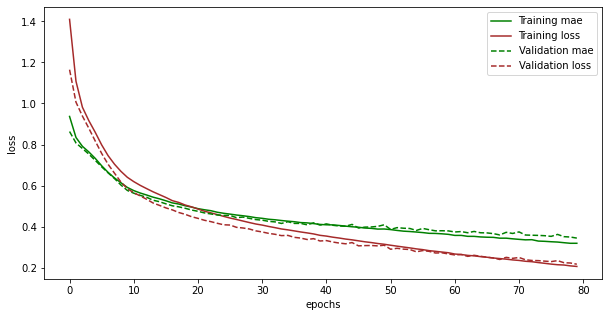

In [33]:
vis_evl(hist)

###### Graph of Actual value(green) AND Prediction (brown)

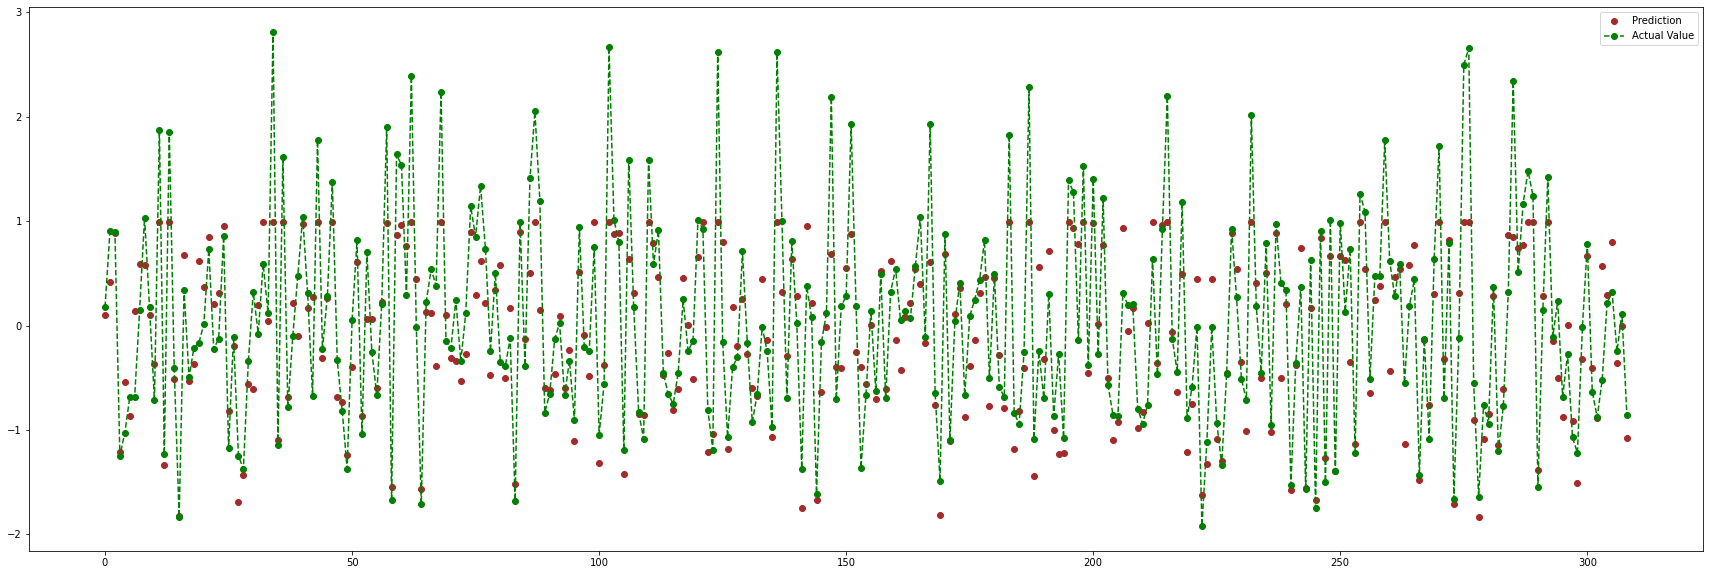

In [34]:
pre_tar(p,un_ms_te_y)

In [43]:
relu_mm = simp('relu',20,10,6,un_tr_x_orig_mm)
mm_hist = relu_mm.fit(un_tr_x_orig_mm, un_tr_y_orig_mm, epochs = 90, validation_split = 0.3)

Epoch 1/90
16/16 [==============================] - 0s 8ms/step - loss: 0.1673 - mae: 0.3339 - val_loss: 0.1007 - val_mae: 0.2439
Epoch 2/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0800 - mae: 0.2146 - val_loss: 0.0605 - val_mae: 0.1817
Epoch 3/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0583 - mae: 0.1859 - val_loss: 0.0512 - val_mae: 0.1673
Epoch 4/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0495 - mae: 0.1696 - val_loss: 0.0420 - val_mae: 0.1516
Epoch 5/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0420 - mae: 0.1547 - val_loss: 0.0368 - val_mae: 0.1413
Epoch 6/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0369 - mae: 0.1442 - val_loss: 0.0317 - val_mae: 0.1324
Epoch 7/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0332 - mae: 0.1361 - val_loss: 0.0298 - val_mae: 0.1278
Epoch 8/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0304 - mae: 0.13

16/16 [==============================] - 0s 2ms/step - loss: 0.0089 - mae: 0.0653 - val_loss: 0.0088 - val_mae: 0.0705
Epoch 64/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0086 - mae: 0.0631 - val_loss: 0.0096 - val_mae: 0.0673
Epoch 65/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0622 - val_loss: 0.0111 - val_mae: 0.0822
Epoch 66/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0085 - mae: 0.0622 - val_loss: 0.0088 - val_mae: 0.0701
Epoch 67/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0080 - mae: 0.0599 - val_loss: 0.0114 - val_mae: 0.0755
Epoch 68/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0082 - mae: 0.0611 - val_loss: 0.0083 - val_mae: 0.0661
Epoch 69/90
16/16 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0627 - val_loss: 0.0085 - val_mae: 0.0664
Epoch 70/90
16/16 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0596 -

In [44]:
l1,e1 = relu_mm.evaluate(un_te_x_orig_mm,un_te_y_orig_mm)
print('\nValidation Results(test data):\nloss',l1,'\nmae ', e1)
p1 = relu_mm.predict(un_te_x_orig_mm)

10/10 [==============================] - 0s 698us/step - loss: 0.0083 - mae: 0.0614

Validation Results(test data):
loss 0.008323082700371742 
mae  0.0613524504005909


###### Trainging and Validation loss & mae are close, So model is not overfishing 

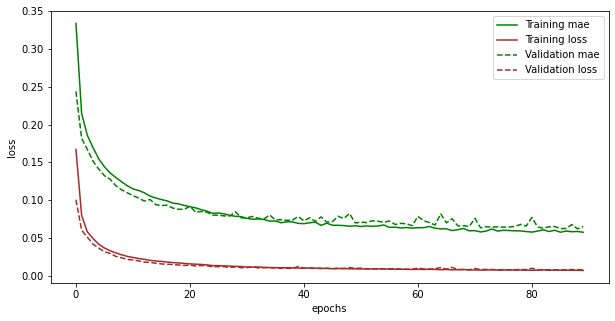

In [45]:
vis_evl(mm_hist)

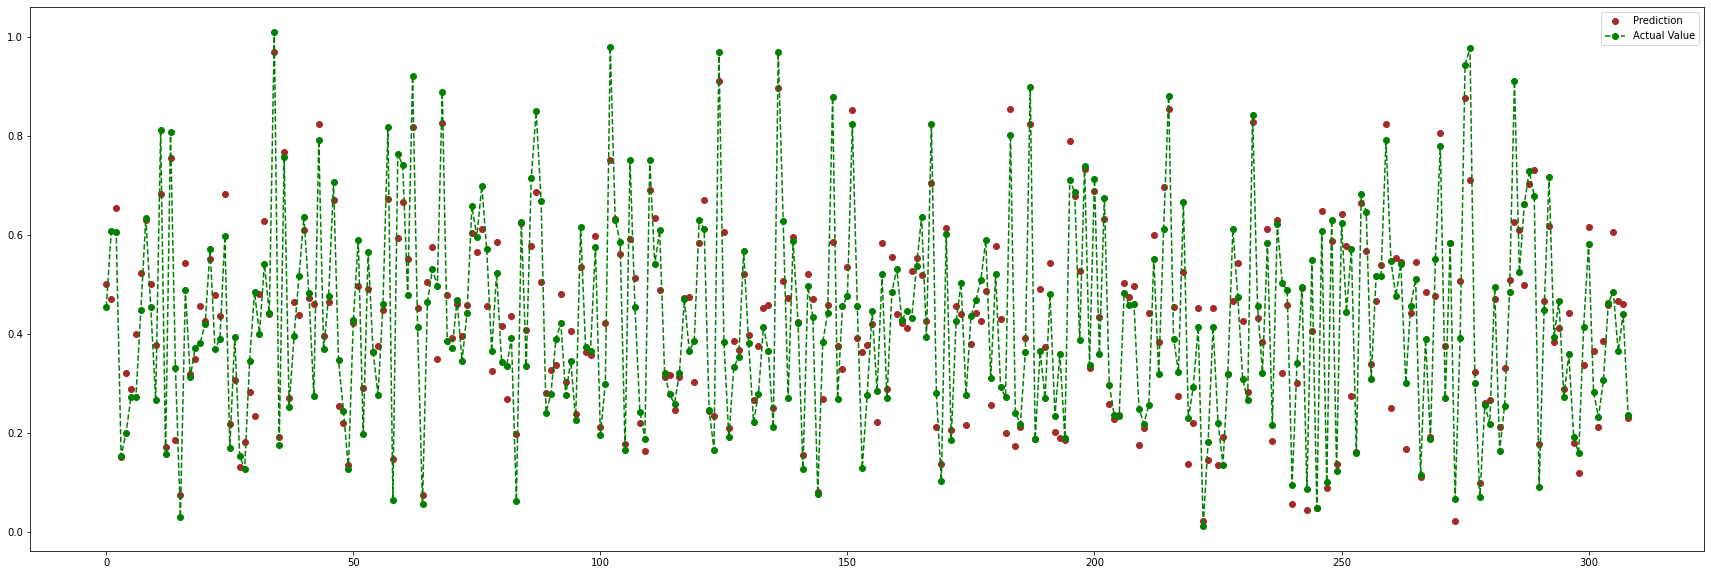

In [46]:
pre_tar(p1,un_te_y_orig_mm)

###### Prediction and evaluation 'loss & mae'  is stored in 'p', 'l','e' respective for mean-std normalized dataset

###### Prediction and evaluation 'loss & mae'  is stored in 'p1', 'l1','e1' respective for 'min-max' normalized dataset

##### I haven't trained model on other data sets because loss and mae was coming very less in last model